# Setup

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.transforms as transforms

In [3]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [4]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [5]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# State preparation

In [11]:
state_log = pd.read_csv(f'{split_logs_dir}/state_transitions.csv', index_col = 0)
state_log.head()

,Timestamp,Log Entry Type,State,Time_s
Log Entry,,,,
2,4,STATE,IDLE,0.004
14,17,STATE,IDLE,0.017
23,27,STATE,IDLE,0.027
32,37,STATE,IDLE,0.037
41,46,STATE,IDLE,0.046


In [12]:
state_log.State.unique()

array(['IDLE', 'THRUSTING', 'COASTING', 'DESCENT'], dtype=object)

In [13]:
state_transitions = state_log.loc[state_log['State'].shift(1) != state_log['State']]

In [14]:
for state_transition in state_transitions.to_dict(orient = 'rows'):
    print(state_transition)

{'Timestamp': 4, 'Log Entry Type': 'STATE', 'State': 'IDLE', 'Time_s': 0.004}
{'Timestamp': 26244, 'Log Entry Type': 'STATE', 'State': 'THRUSTING', 'Time_s': 26.244}
{'Timestamp': 29864, 'Log Entry Type': 'STATE', 'State': 'COASTING', 'Time_s': 29.864}
{'Timestamp': 43814, 'Log Entry Type': 'STATE', 'State': 'DESCENT', 'Time_s': 43.81399999999999}


In [15]:
def plot_states(state_transitions):
    for state_transition in state_transitions.to_dict(orient = 'rows'):
        plt.axvline(state_transition['Time_s'], color='grey', linestyle='--')
        plt.text(state_transition['Time_s'], 0.1, state_transition['State'], fontsize=20, transform=plt.get_xaxis_transform(), rotation=90)

# IMU Plotting

In [11]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)
imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
4,11,0.011,SENSOR,1,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,11,0.011,SENSOR,2,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,11,0.011,SENSOR,3,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,21,0.021,SENSOR,1,29194,IMU,-0.011719,0.051758,-1.027344,0.106870,-0.137405,-0.213740
15,21,0.021,SENSOR,2,29104,IMU,-0.043945,-0.019531,-0.995117,0.030534,-0.229008,-0.137405


In [12]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,Sensor Type,Sensor Board ID,Time_s,Sensor Board Timestamp,Log Entry Type,Timestamp,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,
4,x,IMU,1,0.011,0,SENSOR,11,0.000000,0.000000,x
6,x,IMU,2,0.011,0,SENSOR,11,0.000000,0.000000,x
8,x,IMU,3,0.011,0,SENSOR,11,0.000000,0.000000,x
12,x,IMU,1,0.021,29194,SENSOR,21,-0.011719,0.106870,x
15,x,IMU,2,0.021,29104,SENSOR,21,-0.043945,0.030534,x


In [ ]:
plt = sns.lineplot(data = imu_log_long, x = 'Time_s', y = 'Acc', hue = 'Axis')
plt.set_title(f'EULER Flight Log {log_id}\nAcceleration - Sensor Board 3\n')
plt.set_ylabel('Acceleration [g]')
plt.set_xlabel('Time [s]')
plt.set_ylim(-3, 10)
plot_states(state_transitions)

In [ ]:
plt = sns.lineplot(data = imu_log_long, x = 'Time_s', y = 'Gyro', hue = 'Axis')
plt.set_title(f'EULER Flight Log {log_id}\nGyroscope - Sensor Board 3\n')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

# Baro + Temp Plotting

In [ ]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
baro_log.head()

In [ ]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [Pa]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [ ]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)

## Battery Plotting

In [6]:
battery_log = pd.read_csv(f'{split_logs_dir}/battery.csv', index_col = 0)
battery_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Type,Battery,Consumption,Current,Supply
Log Entry,,,,,,,,,
582,226,0.226,SENSOR,1,BATTERY,619,0,0,3274
592,328,0.328,SENSOR,1,BATTERY,618,0,0,3278
602,430,0.430,SENSOR,1,BATTERY,622,0,0,3274
603,532,0.532,SENSOR,1,BATTERY,616,0,0,3277
613,634,0.634,SENSOR,1,BATTERY,617,0,0,3276


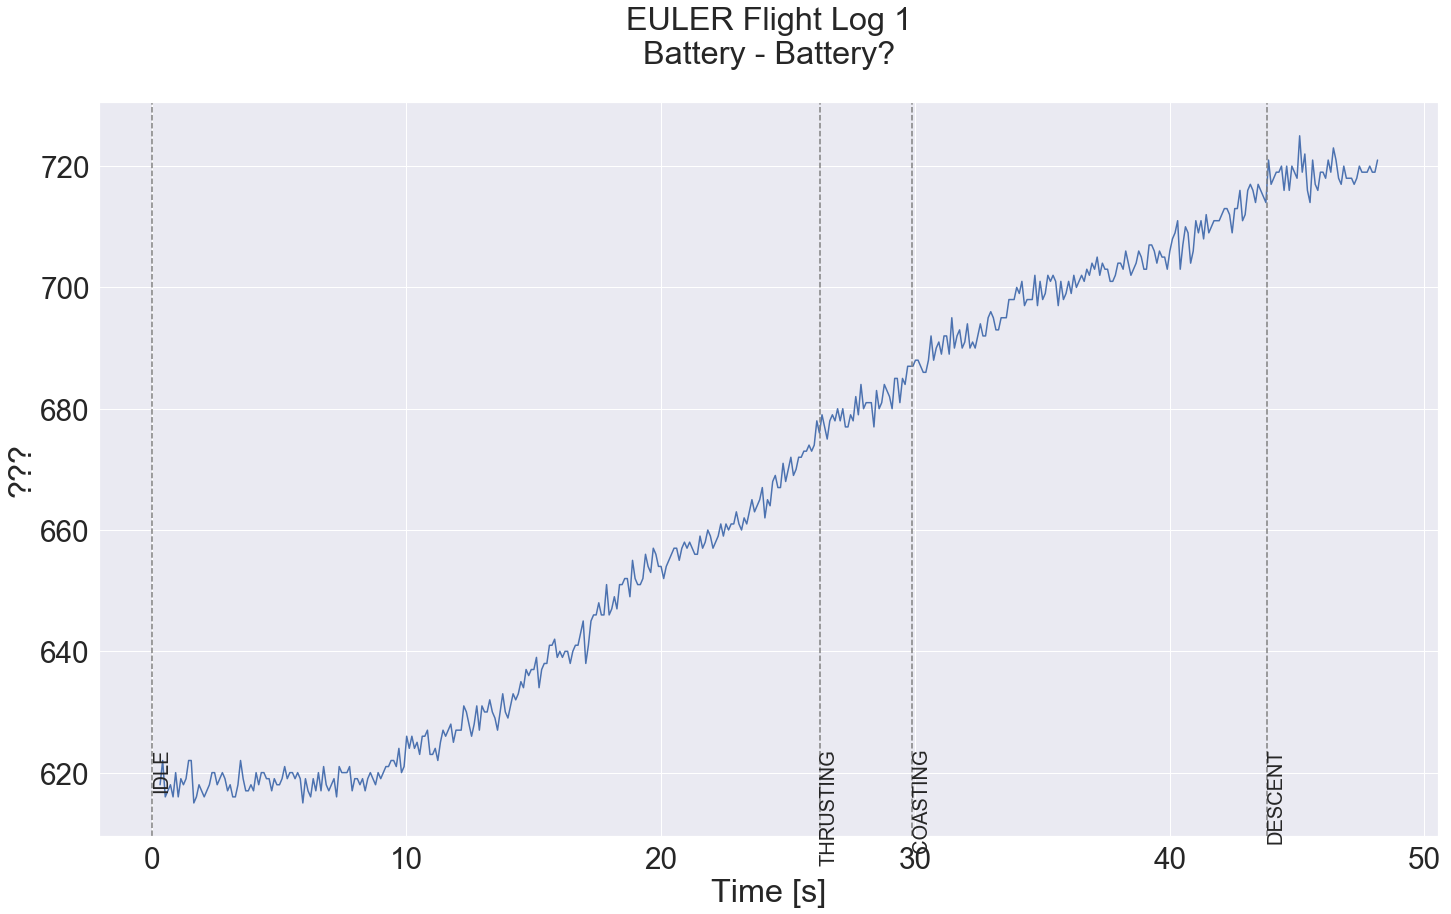

In [16]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Battery')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Battery?\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

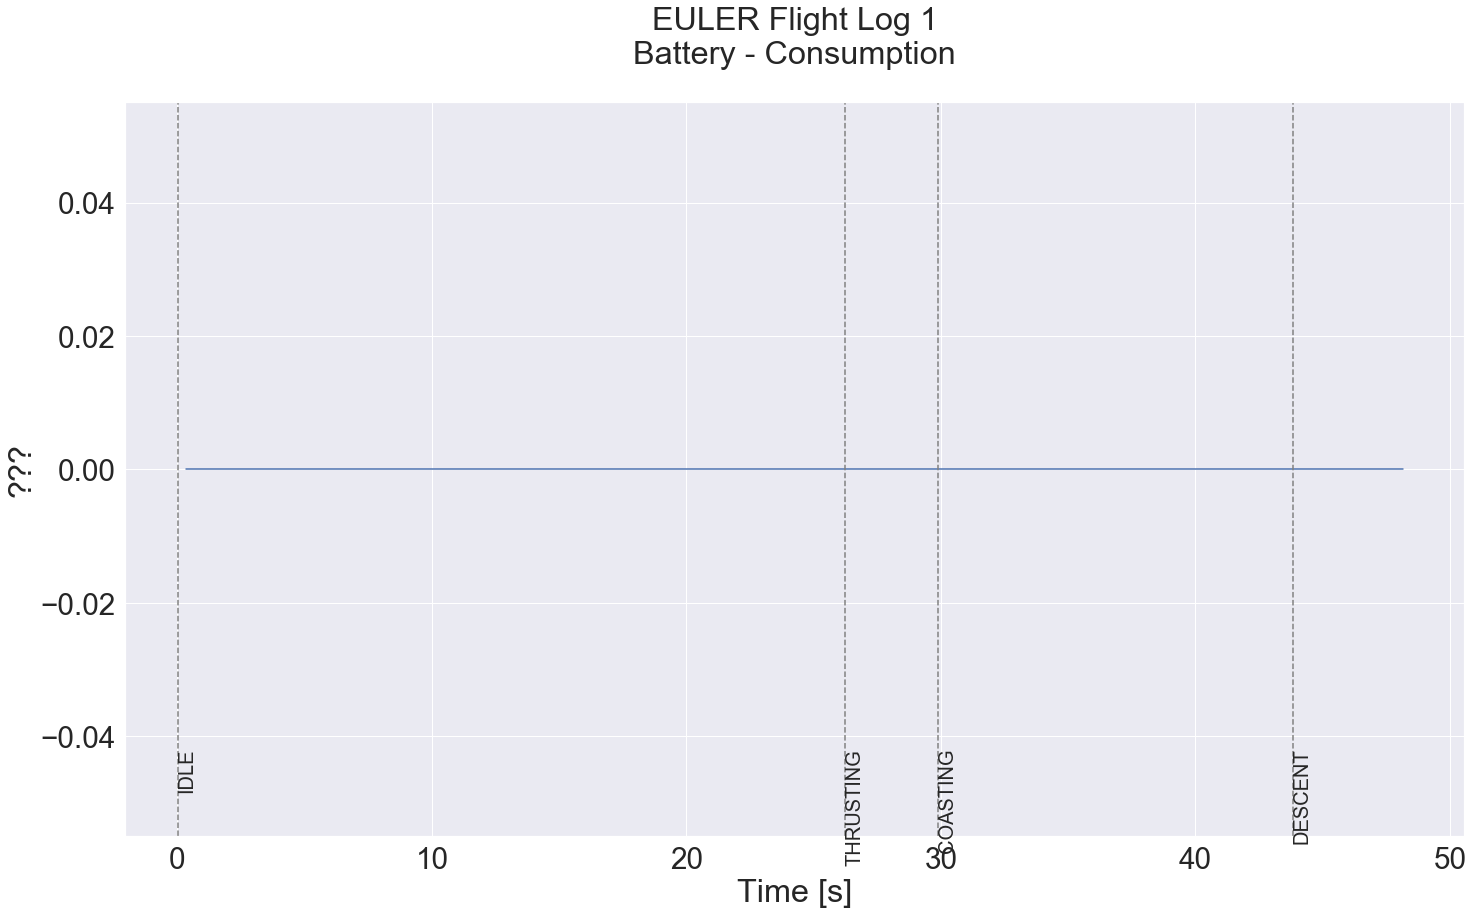

In [17]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Consumption')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Consumption\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

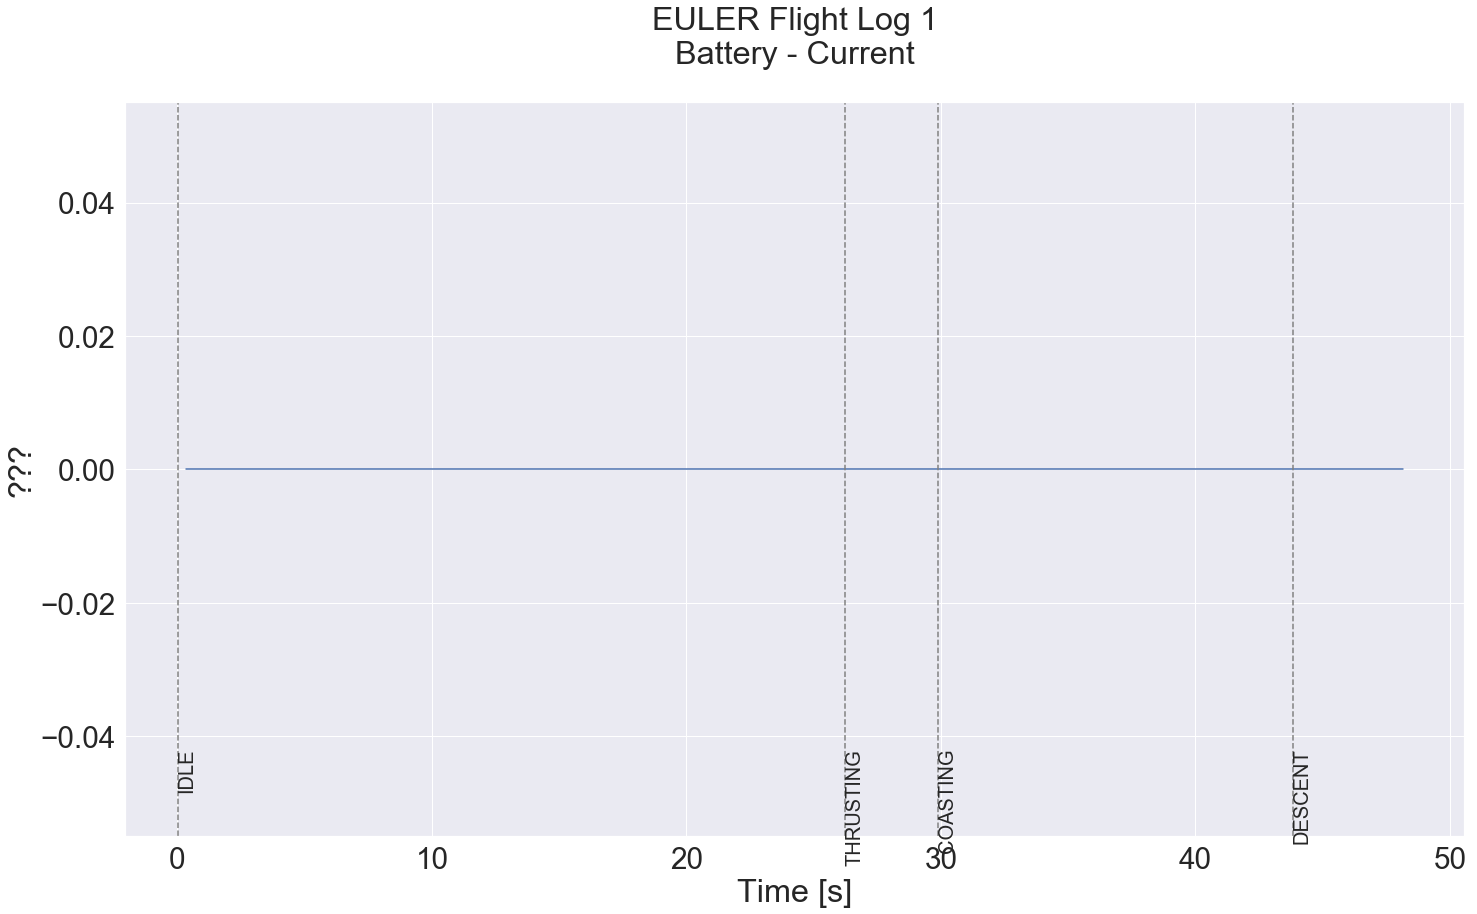

In [18]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Current')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Current\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

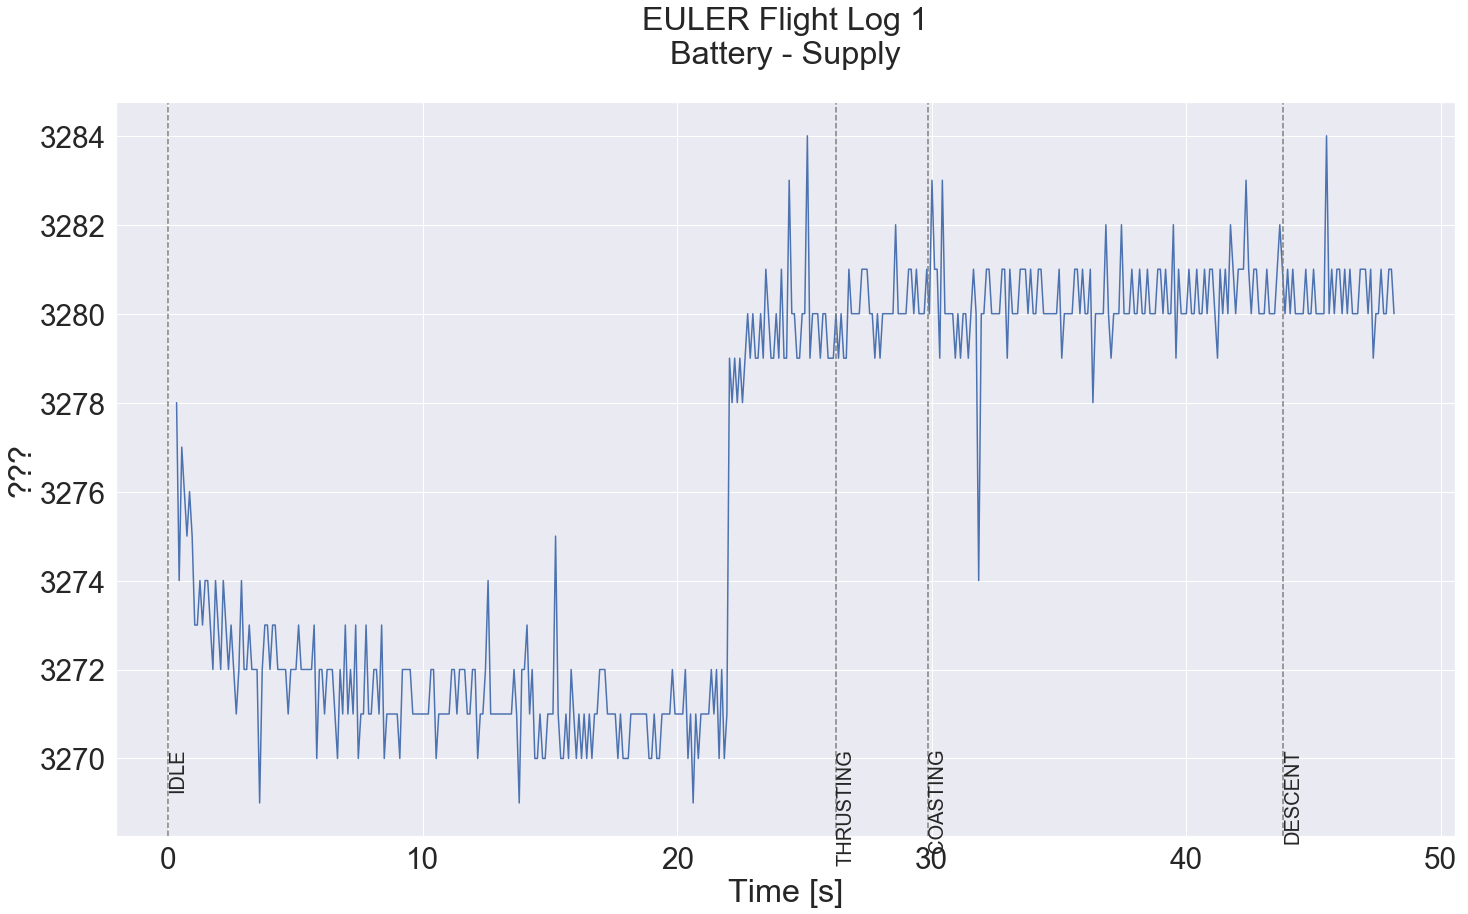

In [19]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Supply')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Supply\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

## Estimator Vars Plotting

In [ ]:
estimator_var_log = pd.read_csv(f'{split_logs_dir}/estimator_var.csv', index_col = 0)
estimator_var_log.head()

In [ ]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'World Position (z)')
plt.set_ylabel('World Position: Z axis [m]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [ ]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Velocity (z)')
plt.set_ylabel('Rocket Velocity: Z axis [m/s]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [ ]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Acceleration (z)')
plt.set_ylabel('Rocket Acceleration: Z axis [m/s^2]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [ ]:
controller_out_log = pd.read_csv(f'{split_logs_dir}/controller_out.csv', index_col = 0)
controller_out_log.head()

In [ ]:
controller_out_log['Controller Output'].unique()

In [ ]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Controller Output')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [ ]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Reference Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [ ]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Integrated Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)